In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint
import HT as HT

# Define parameters:

In [2]:

pars={}
# Soil hydraulic parameters:
pars['thetaR']=0.1        # -
pars['thetaS']=0.4        # -
pars['alpha']=-0.2        # 1/m
pars['n']=1.8             # -
pars['m']=1-1/pars['n']   # - 
pars['Ks']=0.01           # m/d
pars['neta']=0.5          # -

# Basic thermal parameters
#   Latent heat of fusion
pars['Lf']=334000         # J/kg
#   Specific heat capacities
pars['CL']=4200           # J/kg/K
pars['CI']=2100           # J/kg/K
pars['CS']=700            # J/kg/K         
pars['CA']=1000           # J/kg/K
#   Thermal conductivities
pars['lamL']=0.56*86400   # J/d/m/K
pars['lamI']=2.2*86400    # J/d/m/K
pars['lamS']=2.9*86400    # J/d/m/K
pars['lamA']=0.024*86400  # J/d/m/K
pars['a']=-0.5            # exponent in the thermal conductivity model (between -1 and 1 and not 0)

pars['T0']=273.15         # K
pars['rhoL']=1000.        # kg/m3
pars['rhoI']=1000.   #918 # kg/m3
pars['rhoS']=1500.        # kg/m3
pars['g']=9.81            # m/s2


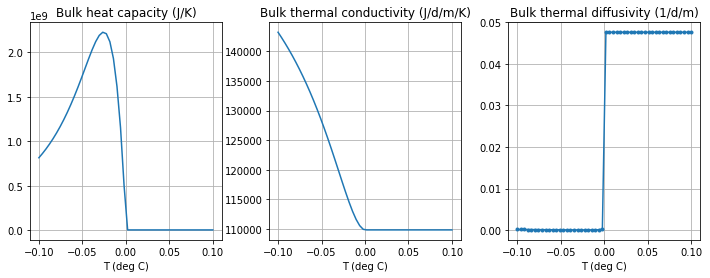

In [3]:
# Test functions:
T=np.linspace(-0.1,0.1)
BHC=HT.BulkHeatCapacityfun(T,pars)
Blam=HT.BulkThermalConductivityfun(T,pars)
pl.figure(figsize=(12,4))
pl.subplot(1,3,1)
pl.plot(T,BHC)
pl.title('Bulk heat capacity (J/K)')
pl.grid()
pl.xlabel('T (deg C)')
pl.subplot(1,3,2)
pl.plot(T,Blam)
pl.title('Bulk thermal conductivity (J/d/m/K)')
pl.grid()
pl.xlabel('T (deg C)')
pl.subplot(1,3,3)
pl.plot(T,Blam/BHC,'.-')
pl.grid()
pl.title('Bulk thermal diffusivity (1/d/m)')
pl.xlabel('T (deg C)')
pl.subplots_adjust(wspace=0.25)
pl.show()

In [4]:
# Space grid
dz=0.01
zMax=0.5
z=np.arange(dz/2,zMax,dz)
nz=len(z)

# Time grid
t=np.arange(0,15,1/24.) # days
nt=len(t)

# Initial condition
T0=np.zeros(nz)-1.

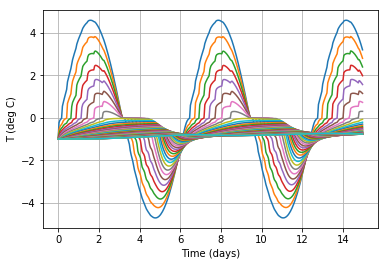

In [5]:
# Sinusoidal scenario
TB=np.sin(t)*5
Hsurf=[]

T=odeint(HT.ODEfun,T0,t,args=(t,TB,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)
pl.plot(t,T)
pl.xlabel('Time (days)')
pl.ylabel('T (deg C)')
pl.grid()

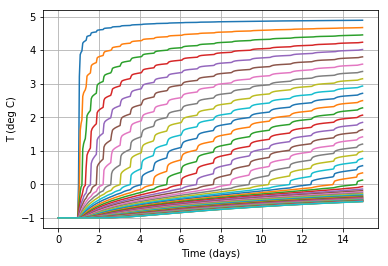

In [6]:
# Sinusoidal scenario
TB=np.zeros(len(t))+5.
TB[t<1]=-1.
Hsurf=[]

T=odeint(HT.ODEfun,T0,t,args=(t,TB,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)
pl.plot(t,T)
pl.xlabel('Time (days)')
pl.ylabel('T (deg C)')
pl.grid()